<a href="https://colab.research.google.com/github/ali-adel/Statistics_EDA/blob/main/22_Chi_Square_Test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from scipy.stats import chisquare,chi2,chi2_contingency
import pandas as pd
import seaborn as sns

# **Chi Square Test**

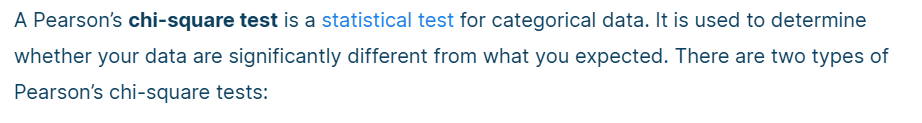

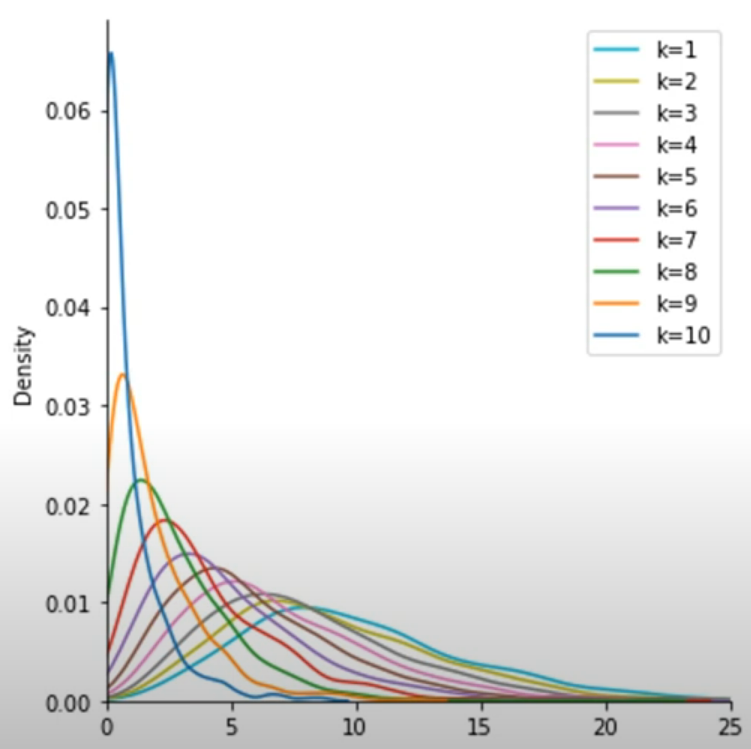

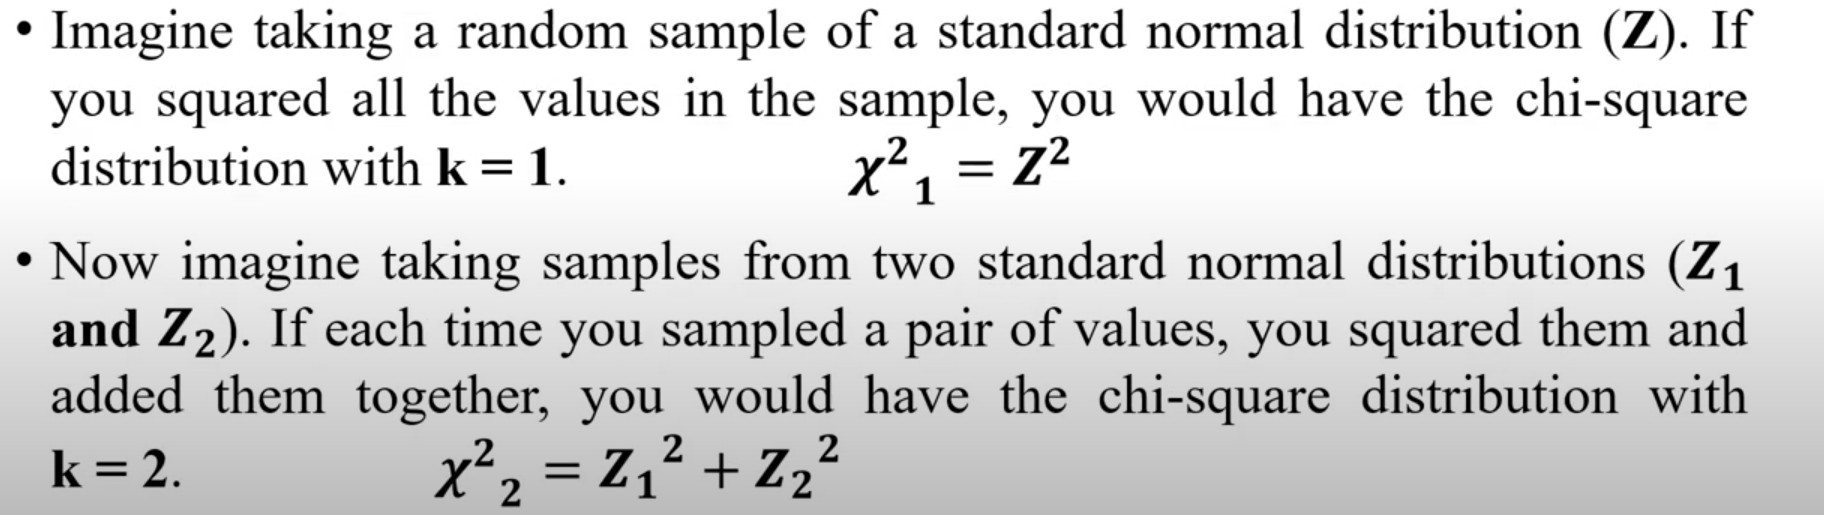

# Note :
# It is a non parametric test as it doesn't follow assumptions of parametric tests especially the assumption of a normal distribution.  


---


# So if we want to test categorical data we should use a non parametric test as categorical data will never follow a normal distribution

# Note : should be at least 5 observations in each group to make this test

# **Types of Chi Square Test**

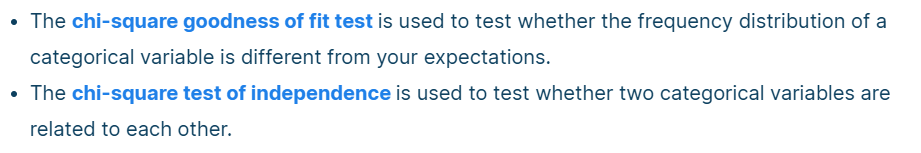

# **1. Chi-square goodness of fit Test**

# degree of freedom (dof) : n - 1  

# **Ex :**
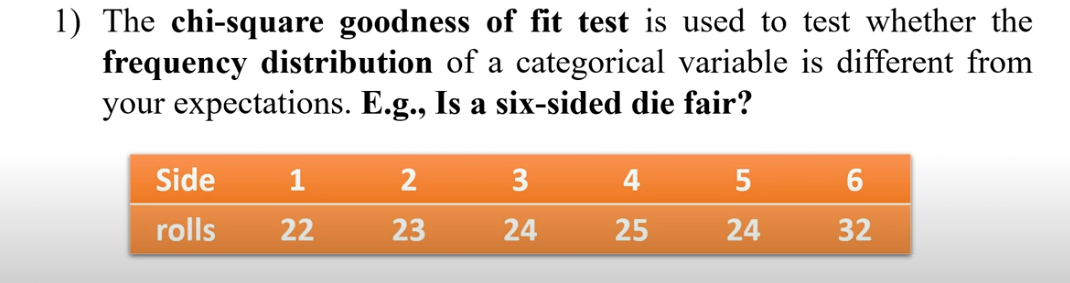

# Note : if we suppose that we expect to have equale proportion to happen


---


# then total rolls = 150 and p = 1/6 so every side have
# probability (Expected) = 1/6  * 150 = 25

# So we should test if the observations in the table actually follow the uniform distribution (i Expect that ) or Not.


# **Using Formula below**

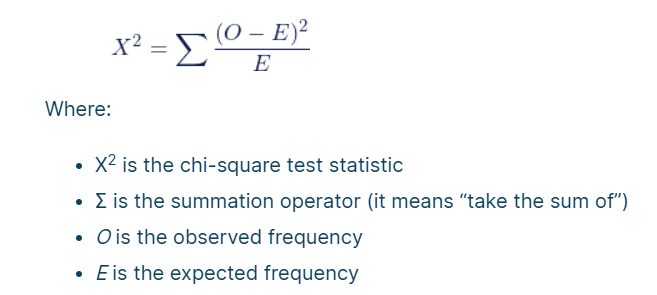



*   Null hypothesis(H0) : have equal proportion
*  Alternative hypothesis(H1) : don't have equal proportion
*   Confidence level (alpha) : 0.05





In [ ]:
chisquare([22,23,24,25,24,32])

Power_divergenceResult(statistic=2.56, pvalue=0.7674330802714071)

**pvalue**

In [ ]:
1-chi2.cdf(2.56,5)

0.7674330802714071

# pvalue > alpha So we don't reject Null Hypothesis (it is follow Uniform distribution in population) so this happen in our sample by chance

#  **2. Chi-square test of independence**

# DOF : (n1-1) (n2-2)

In [ ]:
url = 'https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv'
df = pd.read_csv(url)

In [ ]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# **Ex :**
* H0 : Survived and Pcalss not related
* H1 : Survived and Pcalss related
* alpha : 0.05

<Axes: xlabel='Pclass', ylabel='Survived'>

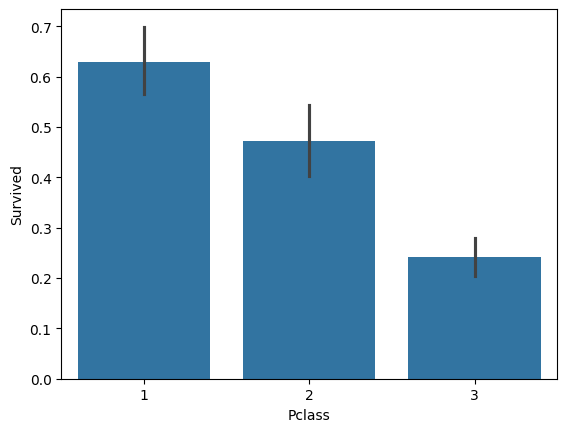

In [ ]:
sns.barplot(data = df , x = 'Pclass',y='Survived')

# Note : it seems that there are difference depending on Pclass but is that Statistically Significant ?
# confirm that using Chi-square test of independence 🥲

# Proportion

In [ ]:
df['Survived'].value_counts()

Survived
0    549
1    342
Name: count, dtype: int64

In [ ]:
df['Pclass'].value_counts()

Pclass
3    491
1    216
2    184
Name: count, dtype: int64

# Proportion for survived

In [ ]:
342 / (549 + 342)

0.3838383838383838

# Proportion for not survived

In [ ]:
549 / (549 + 342)

0.6161616161616161

# contingency tabel

In [ ]:
contingency = pd.crosstab(df['Survived'],df['Pclass'])
contingency

Pclass,1,2,3
Survived,,,
0,80,97,372
1,136,87,119


In [ ]:
chi2_contingency(contingency)

Chi2ContingencyResult(statistic=102.88898875696056, pvalue=4.549251711298793e-23, dof=2, expected_freq=array([[133.09090909, 113.37373737, 302.53535354],
       [ 82.90909091,  70.62626263, 188.46464646]]))

# pvalue < alpha So we will reject H0 (there are difference (related) affect each other)

#**Note**

# if number of classes becomes instead of 3c and 2c (using proportion success and fail) 3c and 3c we can use chi square test but then we call it homogeneity test